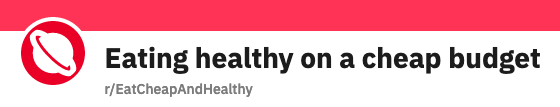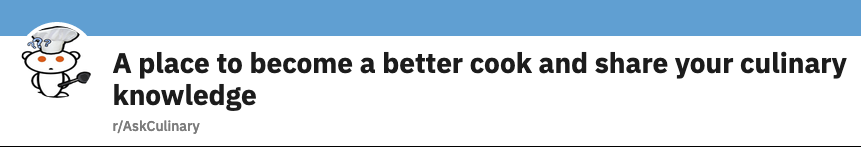

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../cleaned_data/title.csv')

In [3]:
df.head(2)

,title,body,subreddit,title_length,title_word_count,is_ask
0,Does Gabapentin lower your libido?,\n\n[View Poll](https://www.reddit.com/poll/jd...,eatcheapandhealthy,34,5,0
1,Broccoli Meatball Melange,"I was feeling bored, yet creative. I also want...",eatcheapandhealthy,25,3,0


In [4]:
df.shape

(1834, 6)

In [5]:
X = df['title']
y = df['is_ask']

In [6]:
X.shape

(1834,)

In [7]:
y.shape

(1834,)

In [8]:
y.value_counts(normalize = True)

1    0.544711
0    0.455289
Name: is_ask, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y,)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1375,), (459,), (1375,), (459,))

## Logistic Regression with tvec 
- keep stop_words

In [11]:
tvec = TfidfVectorizer()

In [12]:
tvec.fit(X_train)

TfidfVectorizer()

In [13]:
X_train_tvec = tvec.transform(X_train)

In [14]:
X_test_tvec = tvec.transform(X_test)

In [15]:
X_train_df = pd.DataFrame(X_train_tvec.todense(), 
                          columns=tvec.get_feature_names())

In [16]:
X_train_df.shape

(1375, 2689)

In [17]:
X_test_df = pd.DataFrame(X_test_tvec.todense(), 
                          columns=tvec.get_feature_names())

In [18]:
X_test_df.shape

(459, 2689)

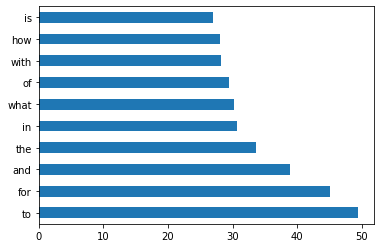

In [19]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train_df, y_train)

LogisticRegression()

In [22]:
cross_val_score(logreg, X_train_df, y_train)

array([0.76363636, 0.83272727, 0.78181818, 0.77090909, 0.76727273])

In [23]:
logreg.score(X_train_df, y_train)

0.9170909090909091

In [24]:
logreg.score(X_test_df, y_test)

0.7995642701525054

## Logistic Regression with tvec 
- remove stop_words

In [25]:
tvec_stopped = TfidfVectorizer(stop_words = 'english')

In [26]:
tvec_stopped.fit(X_train)

TfidfVectorizer(stop_words='english')

In [27]:
X_train_tvec_stopped = tvec.transform(X_train)

In [28]:
X_test_tvec_stopped = tvec.transform(X_test)

In [29]:
X_train_stopped = pd.DataFrame(X_train_tvec_stopped.todense(), 
                          columns=tvec.get_feature_names())

In [30]:
X_train_stopped.shape

(1375, 2689)

In [31]:
X_test_stopped = pd.DataFrame(X_test_tvec_stopped.todense(), 
                          columns=tvec.get_feature_names())

In [32]:
X_test_stopped.shape

(459, 2689)

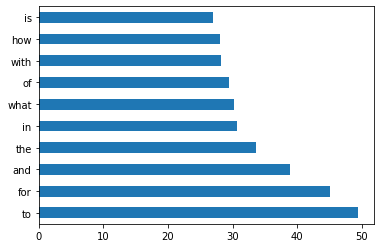

In [33]:
X_train_stopped.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [34]:
logreg.fit(X_train_stopped, y_train)

LogisticRegression()

In [35]:
cross_val_score(logreg, X_train_stopped, y_train)

array([0.76363636, 0.83272727, 0.78181818, 0.77090909, 0.76727273])

In [36]:
logreg.score(X_train_stopped, y_train)

0.9170909090909091

In [37]:
logreg.score(X_test_stopped, y_test)

0.7995642701525054

## Enable pipe and GridSearch

In [38]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [39]:
pipe_tvec_params = {
    'tvec__max_features': [1000, 2000, 3000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [40]:
gs_tvec = GridSearchCV(pipe_tvec, 
                       pipe_tvec_params,
                       cv =5,
                       verbose = 1)

In [41]:
gs_tvec.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'tvec__max_features': [1000, 2000, 3000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [42]:
gs_tvec.score(X_train, y_train)

0.9207272727272727

In [43]:
gs_tvec.best_params_

{'tvec__max_features': 3000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [44]:
preds_tvec = gs_tvec.predict(X_test)

In [45]:
gs_tvec.score(X_test, y_test)

0.7973856209150327